# Ford GoBike System Data Exploration 
## by Hadil Jilani

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# high-level overview of data shape and composition
print(bike.shape)
print(bike.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [5]:
bike.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [6]:
bike.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [7]:
bike.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [9]:
# drop missing values
bike.dropna(inplace=True,axis=0)

In [10]:
# convert user_type, member_gender, and bike_share_for_all_trip into categorical types
cat_var_dict = {'user_type':['Subscriber','Customer'],
               'member_gender':['Male','Female','Other'],
               'bike_share_for_all_trip':['Yes','No']}

for var in cat_var_dict:
    cat_var = pd.api.types.CategoricalDtype(categories = cat_var_dict[var])
    bike[var] = bike[var].astype(cat_var)

In [11]:
# convert start_time and end_time to datetime format
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

In [12]:
# convert start_station_id, end_station_id and member_birth_year to int types
bike['start_station_id'] = bike['start_station_id'].astype(int)
bike['end_station_id'] = bike['end_station_id'].astype(int)
bike['member_birth_year'] = bike['member_birth_year'].astype(int)

In [13]:
# descriptive statistics for numeric variables
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [14]:
bike.end_station_name.value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
Willow St at Vine St                                            5
21st Ave at International Blvd                                  5
Name: end_station_name, Length: 329, dtype: int64

### What is the structure of your dataset?

There are 174952 entries for bike haring information with 16 columns(duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Most variables are numerical (integers and floats), two variables are in datetime format but three variables are categorical with the following compostion: <br>
*user_type :* Subscriber or Customer<br>
*member_gender :* Male, Female or Other<br>
*bike_share_for_all_trip :* Yes or No<br>

### What is/are the main feature(s) of interest in your dataset?

I'm most interesed in the time the average trip can take, and the effect the user type (customer or subscriber) and gender may have on it.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the user type (customer or subscriber) and gender have a strong effect on the length of a given trip. Other features like birth year and start and end time my affect the length of a trip.

## Univariate Exploration

We will start by looking at the distribution of the main feature of interest: `trip_length`

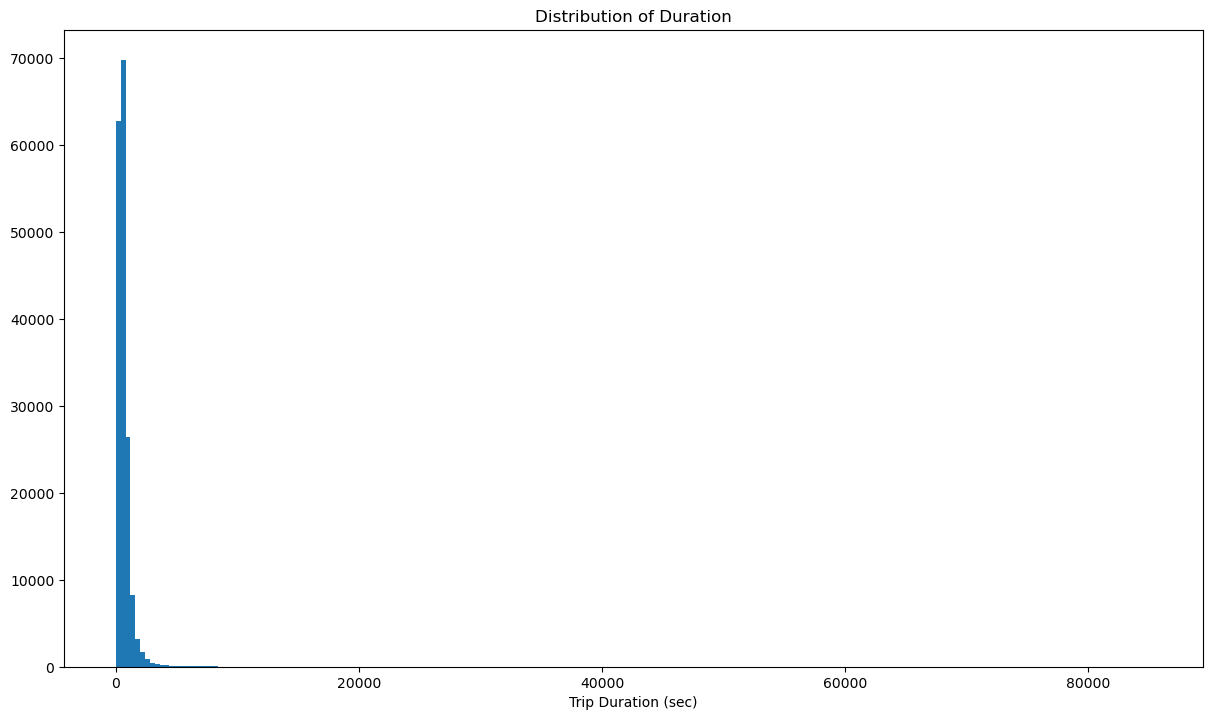

In [15]:
# start with a standard-scaled plot
bin_size = 400
bins = np.arange(0,85000+bin_size,bin_size)
plt.figure(figsize=[14.70, 8.27])
plt.hist(data=bike, x='duration_sec', bins=bins)
plt.xlabel('Trip Duration (sec)')
plt.title('Distribution of Duration');

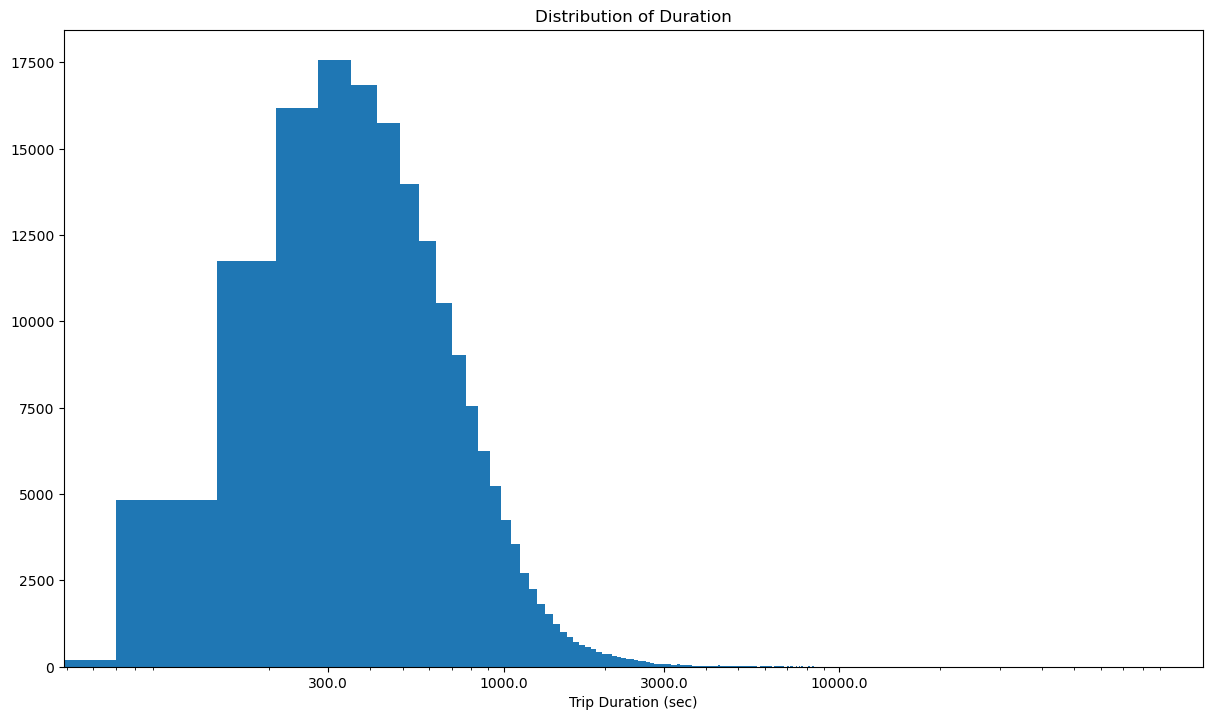

In [16]:
# change the x scale to logarithmic cale
bin_size = 70
bins = np.arange(0,85000+bin_size,bin_size)
plt.figure(figsize=[14.70, 8.27])
plt.hist(data=bike, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([3e2,1e3,3e3,1e4],[3e2,1e3,3e3,1e4])
plt.xlabel('Trip Duration (sec)');
plt.title('Distribution of Duration');

The plot of the duration features show some immediate points of attention. On the plot, most of the data is set to the far right of its axis, suggesting some outliers on the left. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [17]:
# select outliers
outliers = ((bike['duration_sec'] > 50000))
print(outliers.sum())
print(bike.loc[outliers,:])

63
        duration_sec              start_time                end_time  \
0              52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2              61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3401           62452 2019-02-28 00:04:01.344 2019-02-28 17:24:54.137   
5203           83195 2019-02-27 14:47:23.181 2019-02-28 13:53:58.433   
7268           66065 2019-02-27 15:00:20.639 2019-02-28 09:21:26.336   
...              ...                     ...                     ...   
164944         56872 2019-02-04 16:17:52.440 2019-02-05 08:05:44.533   
165066         51574 2019-02-04 17:35:50.621 2019-02-05 07:55:25.306   
174403         67512 2019-02-01 23:54:03.833 2019-02-02 18:39:16.575   
176130         59813 2019-02-01 19:54:49.848 2019-02-02 12:31:43.043   
177144         51488 2019-02-01 17:22:49.870 2019-02-02 07:40:58.473   

        start_station_id                                start_station_name  \
0                     21  Montgomery St BART Station (

In [18]:
# checking if there are points whose the duration does not match the start- and end-time
incorrect_duration = ((np.abs(bike['end_time']-bike['start_time']).dt.total_seconds() - bike['duration_sec'])>1)
bike.loc[incorrect_duration]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


All durations seem to match the start- and end-time. Thus, the outliers seem to be valid points. There is no need to remove them.

As the plot shows, the `duration_sec` plot has a long tail, with a lot of trips being very short and only few that are relatively longer. After being plotted on log-scale, the distribution is skewed to the right and is unimodal, with the peak between 200 and 500 sec

Next up, the first predictor variable of interest: user type.

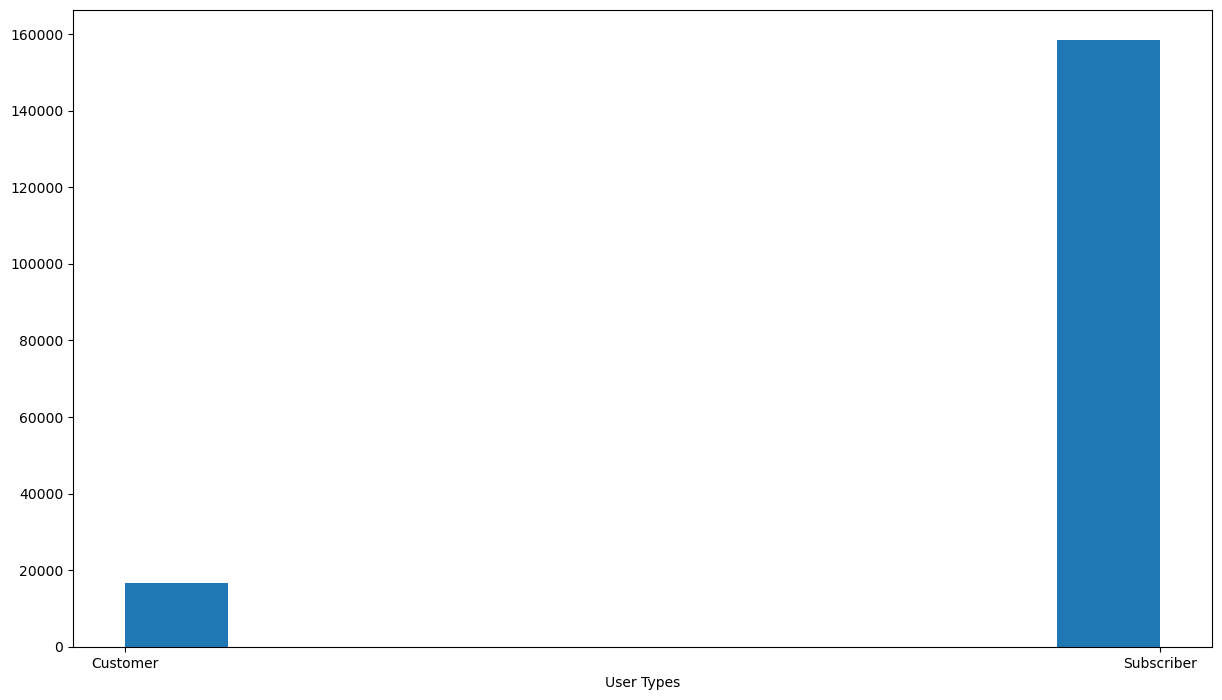

In [19]:
# plot the distribution of user types
plt.figure(figsize=[14.70, 8.27])
plt.hist(data=bike, x='user_type')
plt.xlabel('User Types');

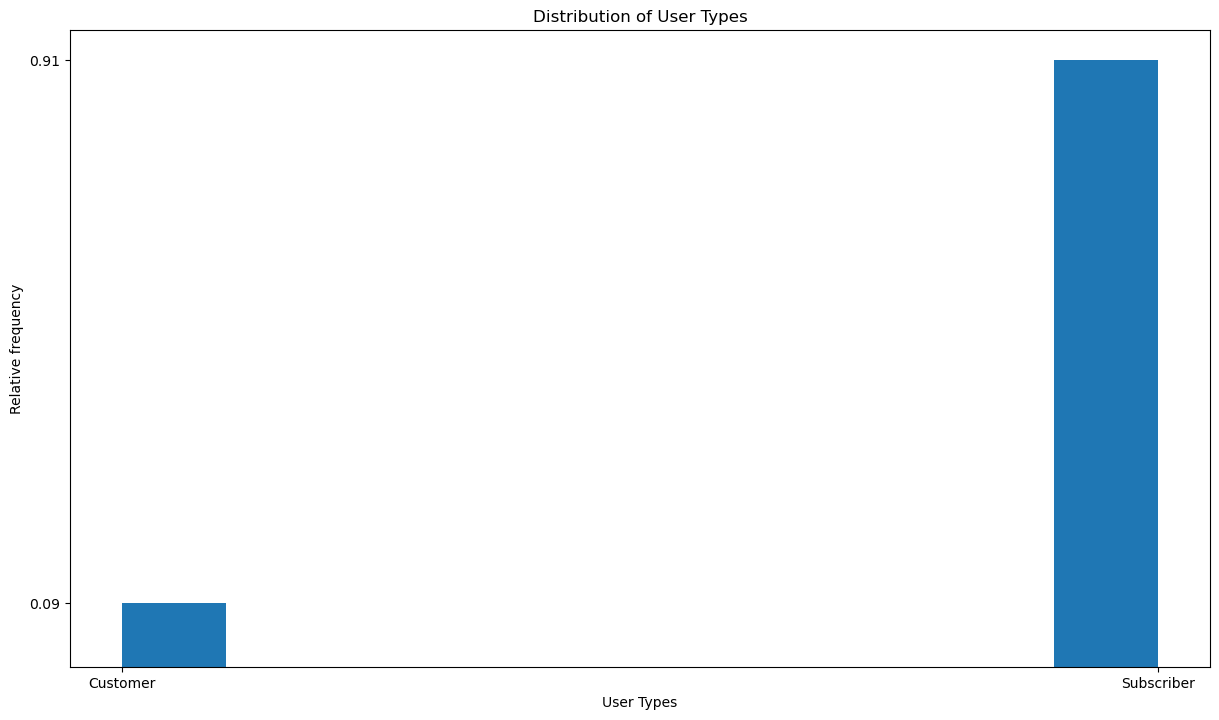

In [20]:
# plot relative frequency distribution
plt.figure(figsize=[14.70, 8.27])
counts = (bike['user_type'].value_counts()).to_list()
plt.hist(data=bike, x='user_type')
plt.xlabel('User Types')
yticks=counts
ylabels=[round((counts[0]/(sum(counts))),2),
        round((counts[1]/(sum(counts))),2)]
plt.yticks(yticks,ylabels)
plt.ylabel('Relative frequency');
plt.title('Distribution of User Types');

As the plot is showing, the larger proportion of bike sharing system users are *subscribers* with a percentage of 91%. The other user type *customer* only covers 9% of the distribution.

Now, let's move to another potential predictor: `member_gender`

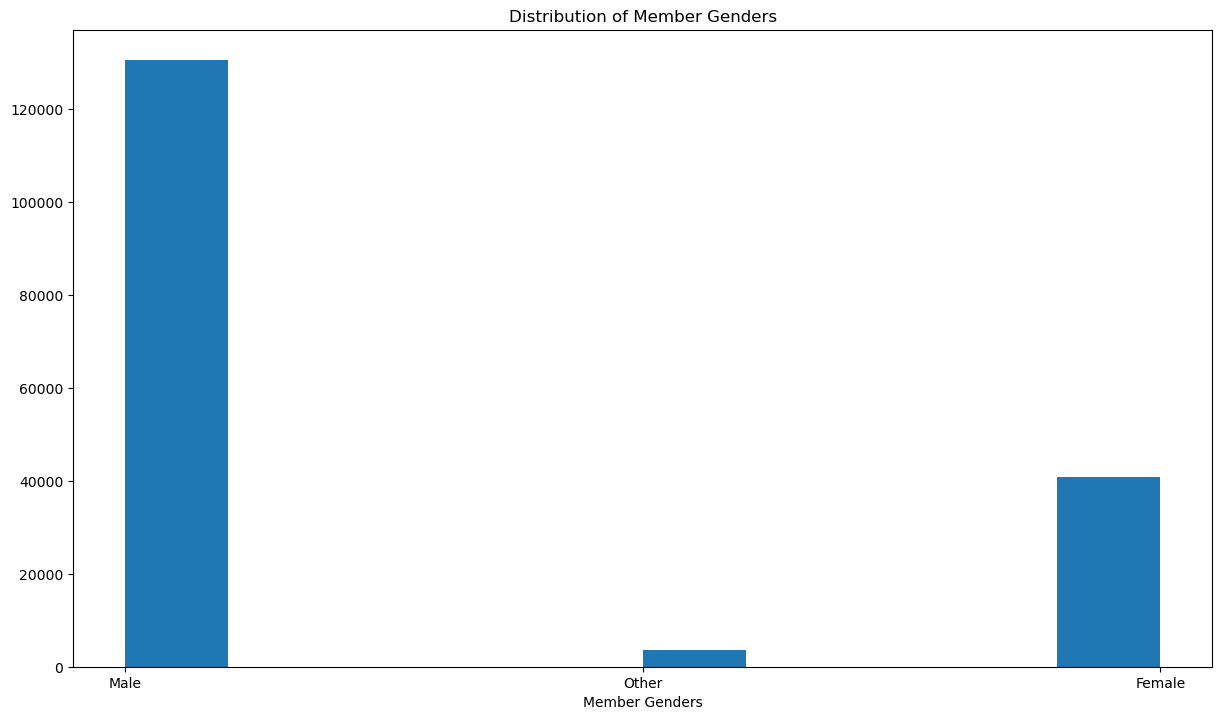

In [21]:
plt.figure(figsize=[14.70, 8.27])
plt.hist(data=bike, x='member_gender')
plt.xlabel('Member Genders');
plt.title('Distribution of Member Genders');

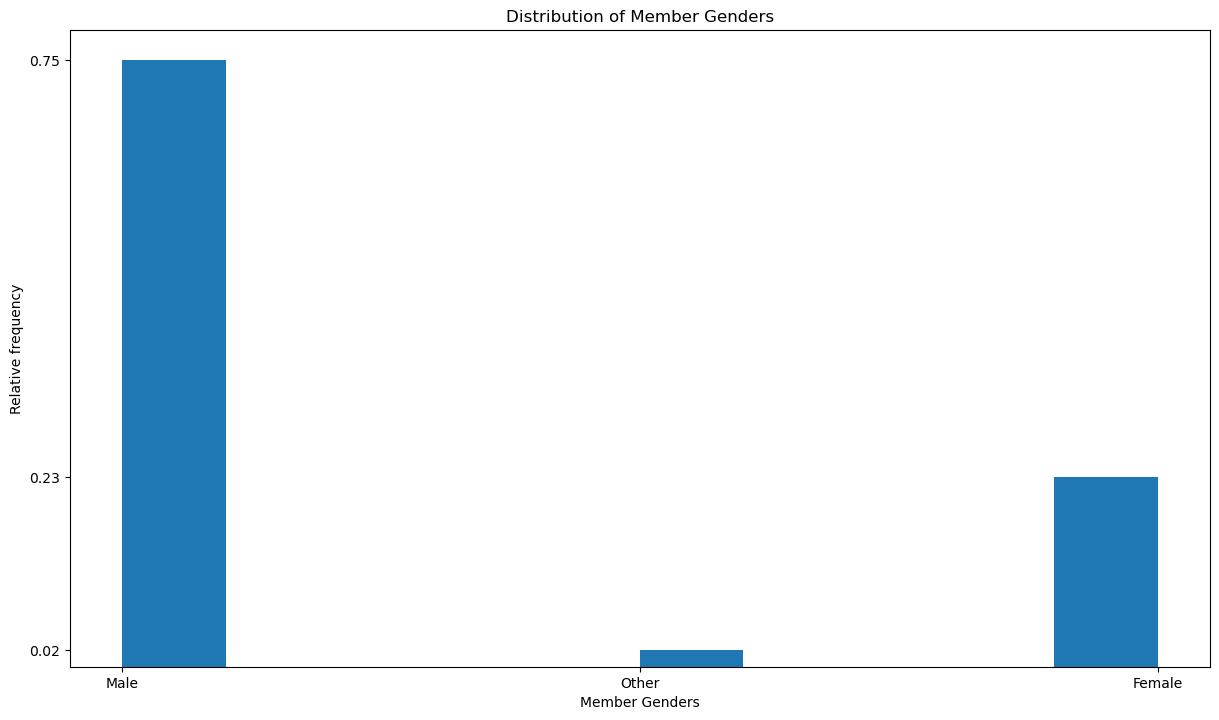

In [22]:
# plot relative frequency distribution
plt.figure(figsize=[14.70, 8.27])
counts_gen = (bike['member_gender'].value_counts()).to_list()
freq_gen = list(map(lambda x: round(x/(sum(counts_gen)),2),counts_gen))
plt.hist(data=bike, x='member_gender')
plt.xlabel('Member Genders')
yticks=counts_gen
ylabels=freq_gen
plt.yticks(yticks,ylabels)
plt.ylabel('Relative frequency');
plt.title('Distribution of Member Genders');

Most of the members in the dataset are males with a oercentage of 75%. There is a weak presence of female subscribers (23%).

Let's have a look on other features that may affect our variable of interest: bike_share_for_all_trip and member_birth_year

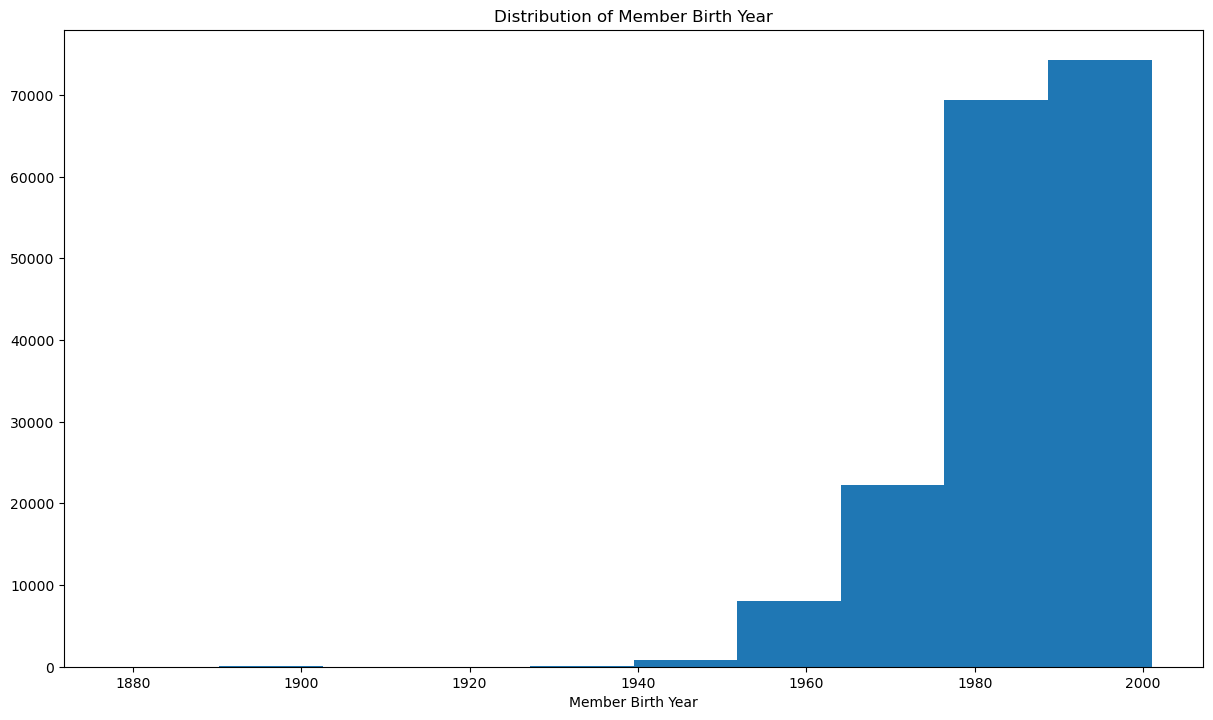

In [23]:
# plot the member_birth_year distribution
plt.figure(figsize=[14.70, 8.27])
plt.hist(data=bike, x='member_birth_year');
plt.xlabel('Member Birth Year')
plt.title('Distribution of Member Birth Year');

Most of the data is set to the far left of its axis, suggesting some outliers on the right.<br>
The points on the far left of the plot of the member_birth_year variable show weird birth years. Consdering the dataset corresponds to information collected in 2019, some birth years that are present such as 1880 and 1900 suggest bike users that are **119** and **139 years old**, which is odd. Investigation is required in this case

In [24]:
# select users that have birth years before 1919, i.e. are older than 100.
bike[bike.member_birth_year<1919]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900,Male,Yes
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343,Bryant St at 2nd St,37.783172,-122.393572,375,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900,Male,No
16087,1131,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375,Grove St at Masonic Ave,37.774836,-122.446546,36,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900,Male,No
19375,641,2019-02-26 17:03:19.855,2019-02-26 17:14:01.619,9,Broadway at Battery St,37.798572,-122.400869,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900,Male,No
21424,1424,2019-02-26 08:58:02.904,2019-02-26 09:21:47.749,375,Grove St at Masonic Ave,37.774836,-122.446546,343,Bryant St at 2nd St,37.783172,-122.393572,5344,Subscriber,1900,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171996,1368,2019-02-03 17:33:54.607,2019-02-03 17:56:42.949,37,2nd St at Folsom St,37.785000,-122.395936,375,Grove St at Masonic Ave,37.774836,-122.446546,4988,Subscriber,1900,Male,No
173711,993,2019-02-03 09:45:30.464,2019-02-03 10:02:04.169,375,Grove St at Masonic Ave,37.774836,-122.446546,36,Folsom St at 3rd St,37.783830,-122.398870,5445,Subscriber,1900,Male,No
177708,1527,2019-02-01 19:09:28.387,2019-02-01 19:34:55.963,343,Bryant St at 2nd St,37.783172,-122.393572,375,Grove St at Masonic Ave,37.774836,-122.446546,5286,Subscriber,1900,Male,No
177885,517,2019-02-01 18:38:40.471,2019-02-01 18:47:18.392,25,Howard St at 2nd St,37.787522,-122.397405,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902,Female,No


We have 72 user that are older than 100, which suggest typos in data.<br>
Given the absence of any explanation for this phenomena, we will only remove entries with member_birth_year before 1919.

In [25]:
# removing entries in which member_birth_year is before 1919
bike=bike[bike['member_birth_year']>1919]

In [26]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174880 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174880 non-null  int64         
 1   start_time               174880 non-null  datetime64[ns]
 2   end_time                 174880 non-null  datetime64[ns]
 3   start_station_id         174880 non-null  int32         
 4   start_station_name       174880 non-null  object        
 5   start_station_latitude   174880 non-null  float64       
 6   start_station_longitude  174880 non-null  float64       
 7   end_station_id           174880 non-null  int32         
 8   end_station_name         174880 non-null  object        
 9   end_station_latitude     174880 non-null  float64       
 10  end_station_longitude    174880 non-null  float64       
 11  bike_id                  174880 non-null  int64         
 12  user_type       

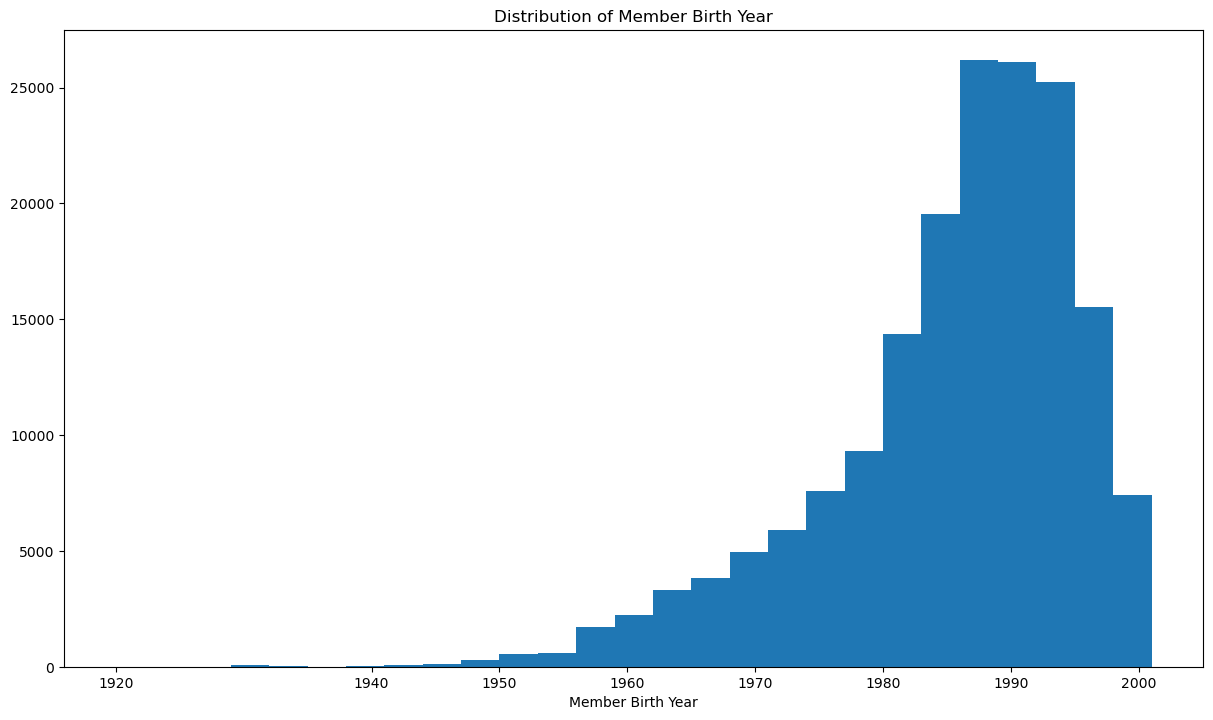

In [27]:
# re-plot the distribution after changes
plt.figure(figsize=[14.70, 8.27])
bin_size = 3
bins = np.arange(1920,2000+bin_size,bin_size)
plt.hist(data=bike, x='member_birth_year', bins=bins);
xticks=[1920,1940,1950,1960,1970,1980,1990,2000]
plt.xticks(xticks,xticks)
plt.xlabel('Member Birth Year');
plt.title('Distribution of Member Birth Year');

The distribution is skewed to the left and unimodal. The peak is between 1985 and 1995 (users between 24 and 34 years old).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable took on a large range of values, so I looked at the data using a log transformation. Under the transformation, the data seemed roughly unimodal, with the peak between 200 and 500 sec (eq. 3.33 and 8.33 minutes).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Of the features I investigated, the `duration_sec` variable showed some points that are potential outliers. Later, investigation revealed thae points to be valid. So nothing was changed or modified.<br>
As for the `member_birth_year` variable, some points seemed to be invalid. There were birth years before 1900 back to 1878, suggesting users older than 119 years old at the time data was collected (2019). For safety, such points were removed. Given that no explanation were provided for this phenomenon, only points below 1919 were removed from the dataset (users older than 100 years old).

## Bivariate Exploration
To start off with, I want to look at the relationship between the start time of the trip and the duration.

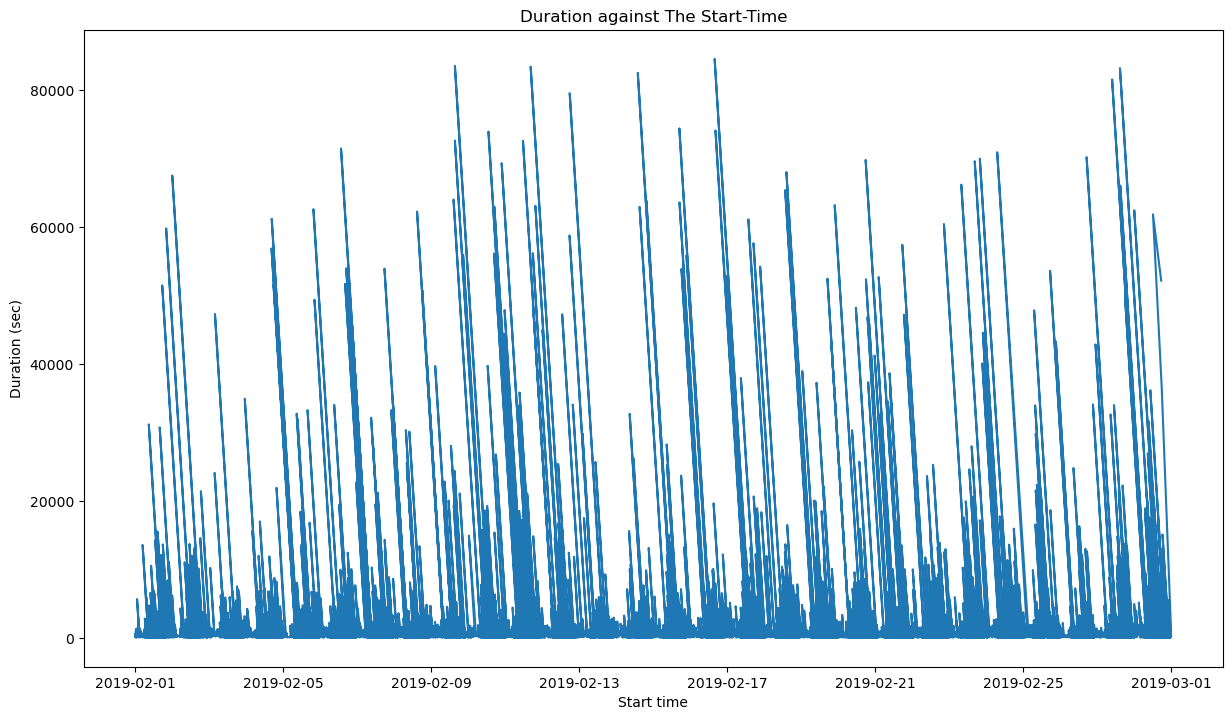

In [28]:
plt.figure(figsize=[14.70, 8.27])
plt.plot(bike['start_time'],bike['duration_sec'])
plt.xlabel('Start time')
plt.ylabel('Duration (sec)')
plt.title('Duration against The Start-Time');

The plot look messy and uninterpretable. A good idea is to group the start_time into hours of the day and plot against it the average duration of the trip. For this I will create a new column `hour` that conveys the hour of the day the trip started.

In [29]:
# create a new column: hour
bike['hour'] = bike['start_time'].dt.hour

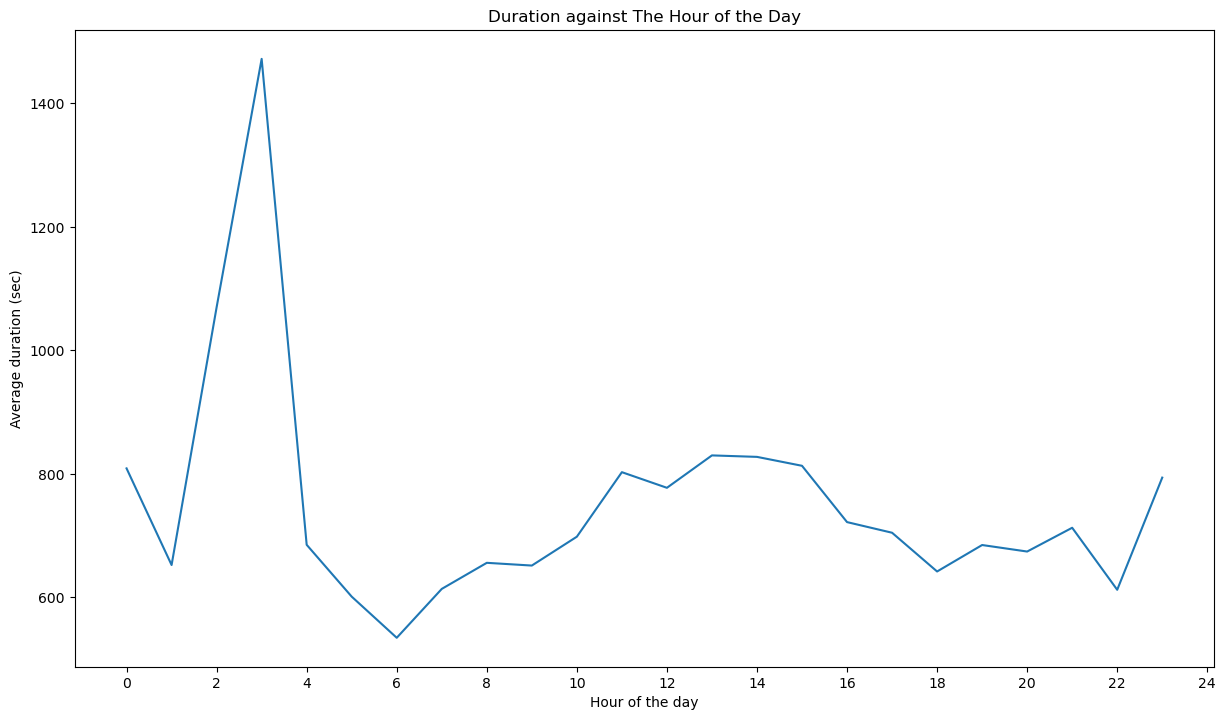

In [30]:
# plot the average duration of the trip against the hour of the day it started
plt.figure(figsize=[14.70, 8.27])
plt.plot(bike.groupby('hour').mean(numeric_only=True)['duration_sec'])
xticks=np.arange(0,23+2,2)
plt.xticks(xticks,xticks)
plt.xlabel('Hour of the day')
plt.ylabel('Average duration (sec)');
plt.title('Duration against The Hour of the Day');

The plot presents a peak around 1am and 4 am. It shows that longer trips tend to start early in the morning (between 2 am and 3:30am).<br>
For hours from 11am to 15pm, the average duration seem to be stable aroound 800 sec (13.3 min).

Now Let's view the distribution of the average duration against another potential predictor: user_type

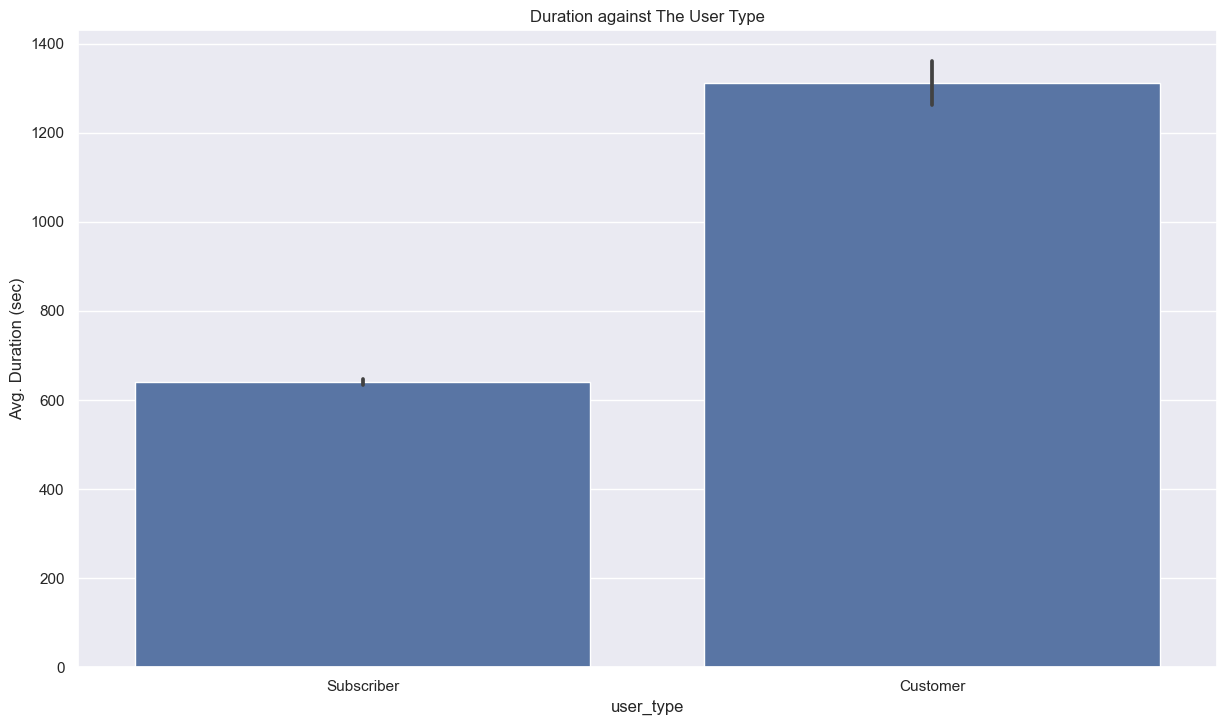

In [31]:
# plot average duration against user type
sb.set(rc = {'figure.figsize':(14.70,8.27)})
base_color = sb.color_palette()[0]
sb.barplot(data=bike, x='user_type', y='duration_sec', color=base_color)
plt.ylabel('Avg. Duration (sec)');
plt.title('Duration against The User Type');

The subscriber type has an average trip duration of 650 sec(approximately 11 min) while the customer type has around 1300 sec (21.6 min). It looks from the plot that customers tend to have longer trips than subscribers. It looks like the user type has an important influence of the duration of the trip.

Let's now check gender's effect on the user's trip duration.

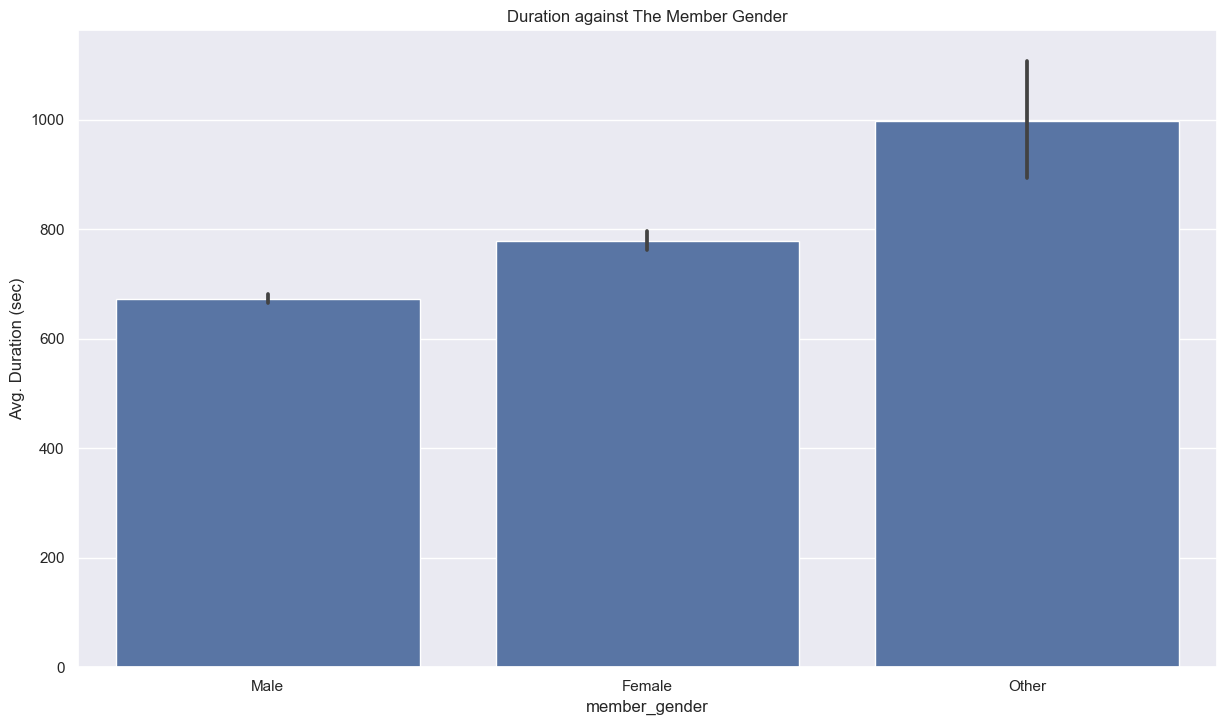

In [32]:
# plot the duration against member_gender
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.barplot(data=bike, x='member_gender', y='duration_sec', color=base_color)
plt.ylabel('Avg. Duration (sec)');
plt.title('Duration against The Member Gender');

From the plot, the difference between duration in three genders is clear. Users of genders other than male or female tend to have higher avg. duration of 950 sec (15.8 min) against female (780 sec) and male (680 sec). The gender  seems to be strong predictor of the trip duration.

Now we verify the influence of whether the bike was shared the enire trip or no on the duration

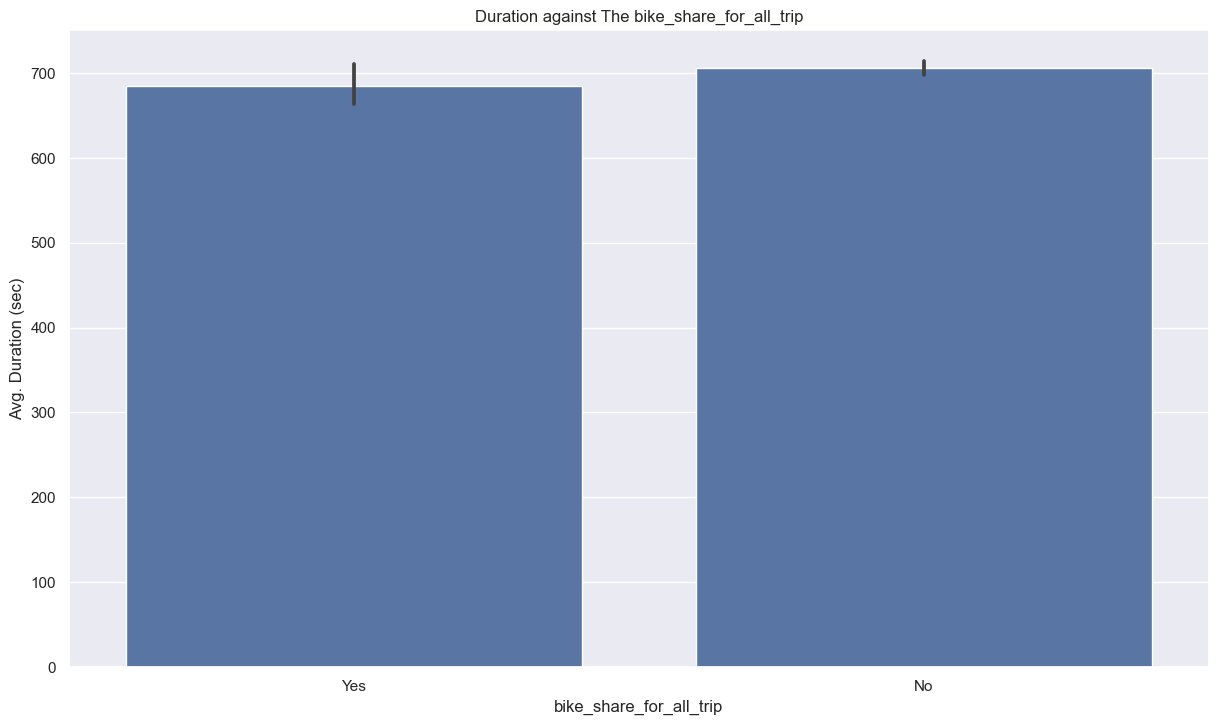

In [33]:
# plot the duration against bike_share_for_all_trip
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.barplot(data=bike, x='bike_share_for_all_trip', y='duration_sec', color=base_color)
plt.ylabel('Avg. Duration (sec)');
plt.title('Duration against The bike_share_for_all_trip');

There isn't much difference between the two cases (Yes and No). The average duration for both values are approxiamately the same (690 and 700 sec).<br>
Like in the case of gender, whether the bike was shared the entire trip or no doesn't affect the duration of the trip.

Finally, I will look at the relationship between the birth year of the user and the length of the trip.

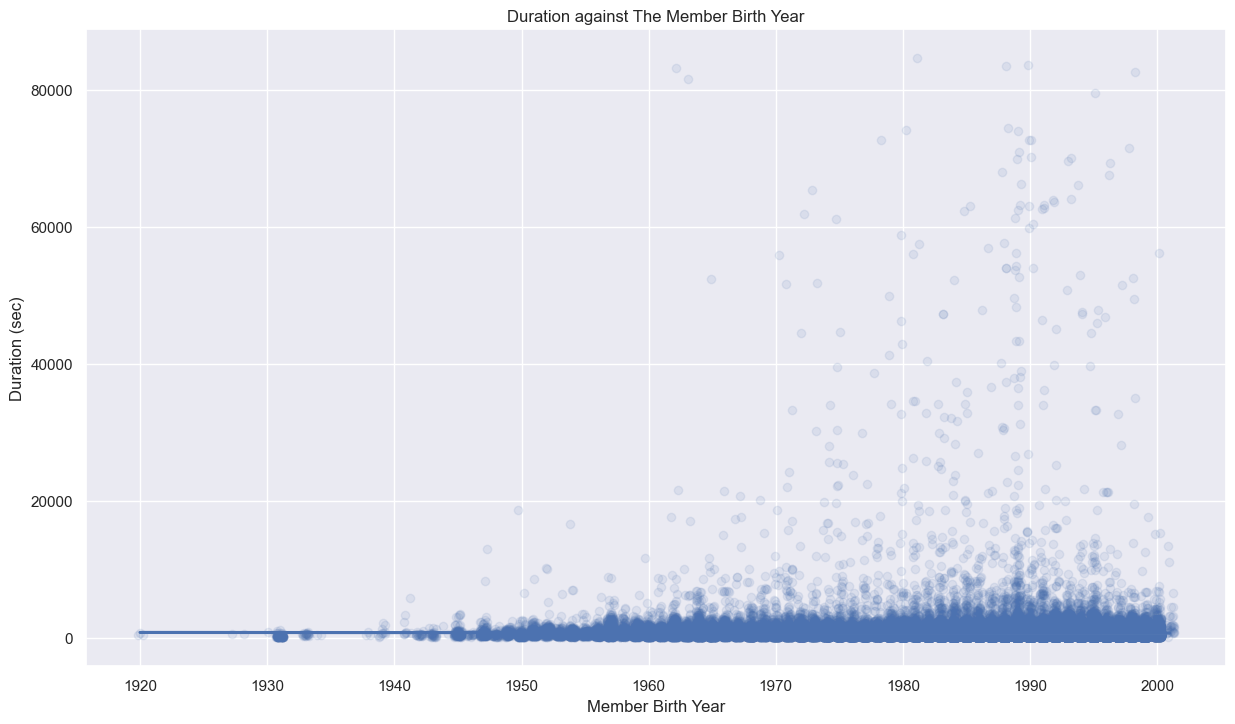

In [34]:
# scatter plot of duration against birth year
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.regplot(data = bike, x = 'member_birth_year', y = 'duration_sec',
          truncate=0.2, x_jitter=0.3, scatter_kws={'alpha':1/10});
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (sec)');
plt.title('Duration against The Member Birth Year');

The visualization is overplotted. I will try to plot the average duration for each birth year.

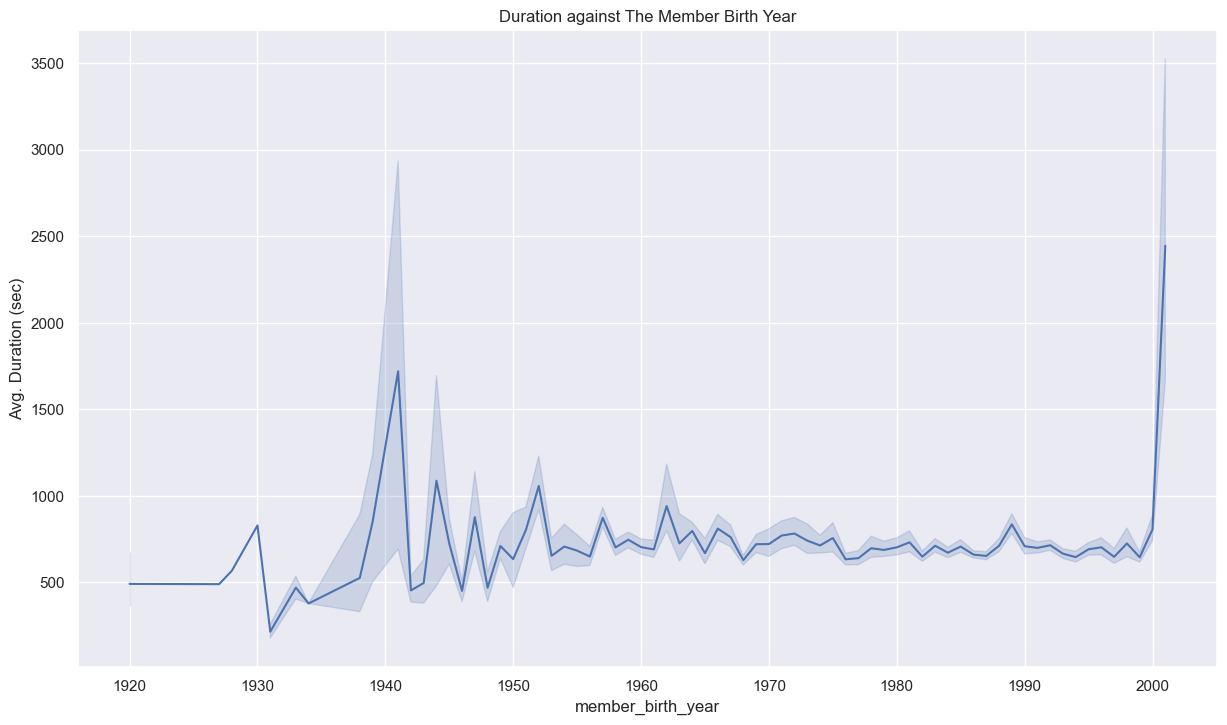

In [35]:
# line plot of average duration against birth year
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.lineplot(data=bike, x='member_birth_year', y='duration_sec')
plt.ylabel('Avg. Duration (sec)');
plt.title('Duration against The Member Birth Year');

The distribution presents two major peaks: one in 1940 (1700 sec) and the other in 2001 (2400 sec). The rest of the distribution is set between 200 and 1000 sec.

Let's look at some relationships between the other features

In [42]:
def count_plot(x_col, hue_col=None,title=None):
    sb.set(rc = {'figure.figsize':(14.70,8.27)})
    if hue_col:
        ax = sb.countplot(data=bike, x=x_col, hue=hue_col);
    else:
        ax = sb.countplot(data=bike, x=x_col);
    if title:
        ax.set_title(title)
    return ax

<AxesSubplot:title={'center':'User Type Vs. Member gender'}, xlabel='user_type', ylabel='count'>

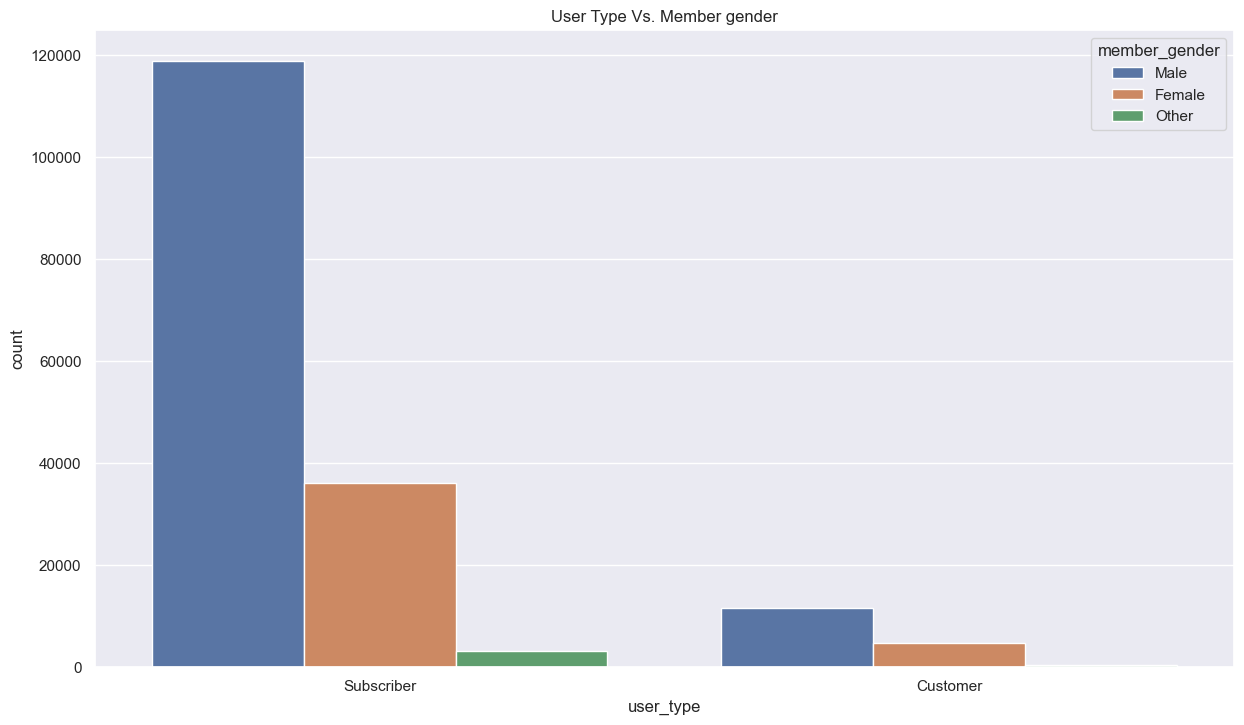

In [43]:
# plot the distribution of user type vs. member gender
count_plot(x_col='user_type', hue_col='member_gender', title='User Type Vs. Member gender')

For the customers, the difference between gender isn't very important comparing to the case of subscribers, where male gender counts for 120,000 entries whereas fmale gender 37000, and other genders 2500.

<AxesSubplot:title={'center':'Member Gender Vs. bike_share_for_all_trip'}, xlabel='member_gender', ylabel='count'>

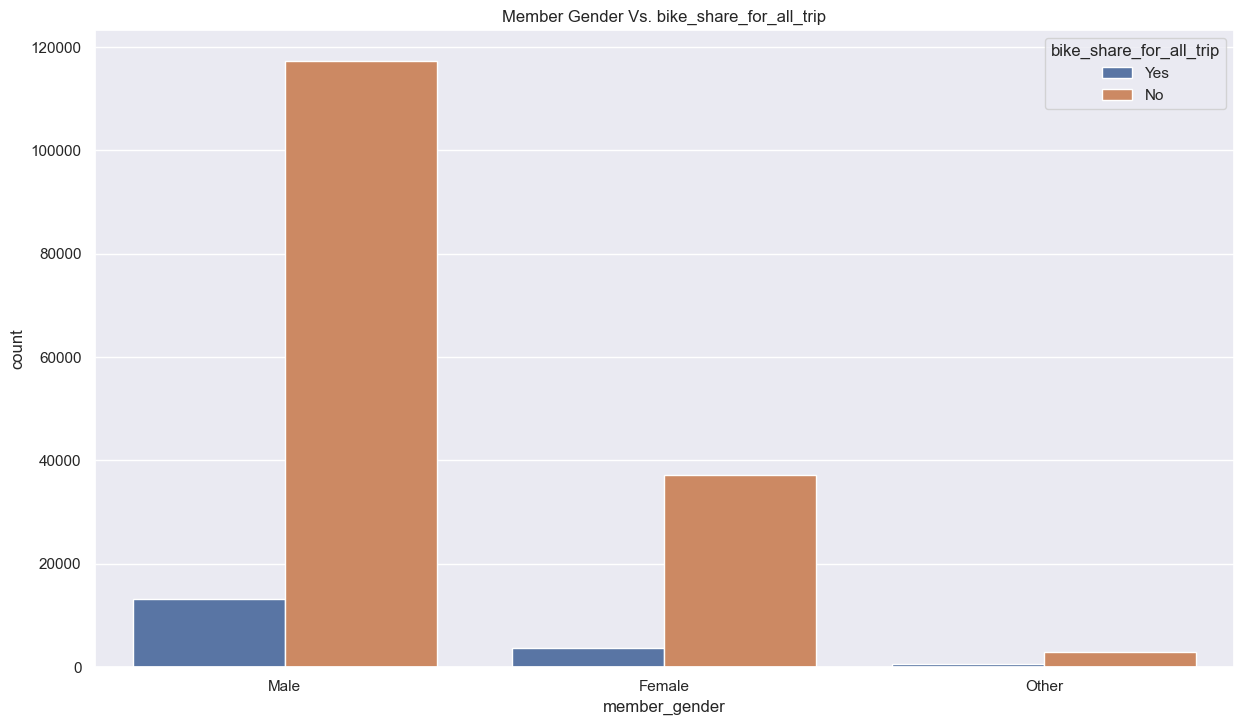

In [44]:
# plot the distribution of bike_share_for_all_trip vs. member gender
count_plot(x_col='member_gender', hue_col='bike_share_for_all_trip', title='Member Gender Vs. bike_share_for_all_trip')

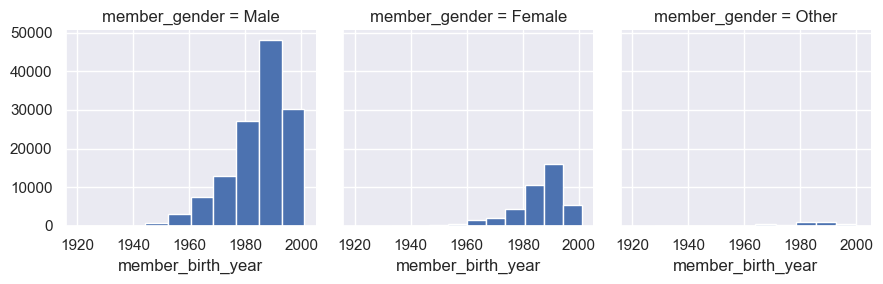

In [45]:
# creat faceted distributions of birth year on levels of member gender
sb.set(rc = {'figure.figsize':(14.70,8.27)})
g = sb.FacetGrid(data=bike, col='member_gender')
g.map(plt.hist,'member_birth_year')

We can see that the distribution for all genders is similar: skewed to the left with peak between 1985 and 1995.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

When investigating the relationship between the duration of the trip and the type of users, the result were interesting. With a big difference, customer have tendencies to conduct average longer trips than subscribers. The user type seems to be a strong predictor of the length of trip.<br>

As for the gender, the investigation showed that gender can play a role in predicting the average duration of the trip, with the other genders having the highest value, then females then males.

Another interesting Feature was the time of the day in which the trip started. I engineered a feature named `hour` that shows starting hour for the trip in the day. Surprisingly, there was a strong peak in hours between 1am and 4am with a duration of 1500 sec (25 min). This suggests that trips early in the morning tend to be longer than the rest of the day

Whether the bike was shared the entire trip or not seemed to have no influence whatsoever on the avg. duration. The values for both cases were very close and no pattern stood out as a potential predictor.<br>

Finally, the birth year of the users has a peak in 1940 and 2001, with local maxima from 1950 to 1960. There seems to be an influence over the avg. duration, but this variable doesn't stands out as a strong predictor.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I observed relationships between user type and member gender, user type and whether the bike was shared the entire trip or not, and member gender and member birth year. The investigation shows the strong domination of male users among the subscribers. but the distributions of genders among user types follow similar patterns, no interesting findings.

## Multivariate Exploration

I want to see how to the user types play into the relationship between the duration of the trip and the hour of the day it started

In [46]:
# first group the hour, user type and the mean duration in one table
bike_hour_type = bike.groupby(['hour','user_type','member_birth_year']).mean(numeric_only=True)

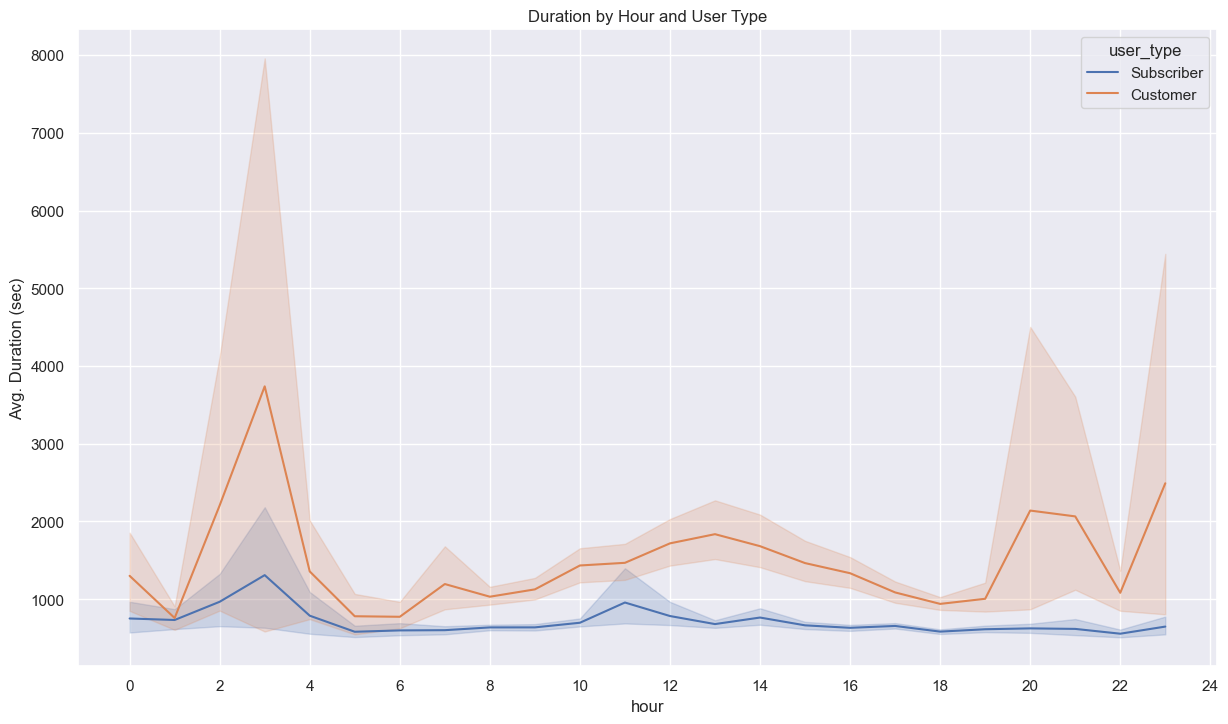

In [47]:
# line plot of average duration against hour and user type
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.lineplot(data=bike_hour_type, x="hour", y="duration_sec",hue='user_type')
xticks=np.arange(0,23+2,2)
plt.xticks(xticks,xticks)
plt.ylabel('Avg. Duration (sec)');
plt.title('Duration by Hour and User Type');

As confirmed in the previous section, the customers has the lion's share when it comes to the average duration of the trip.<br>
An interesting thing is that, both the subscribers and the customers plot follow a similar pattern. Both plots peak between 1 am and 4 am, and are low and generally stable in the rest of the day. This suggests that the user type affects the average duration of the trip, but doesn't affct the peak times or the pattern followed by the plot.

Let's look at the interaction between user types and birth year and their influence on the avg. duration

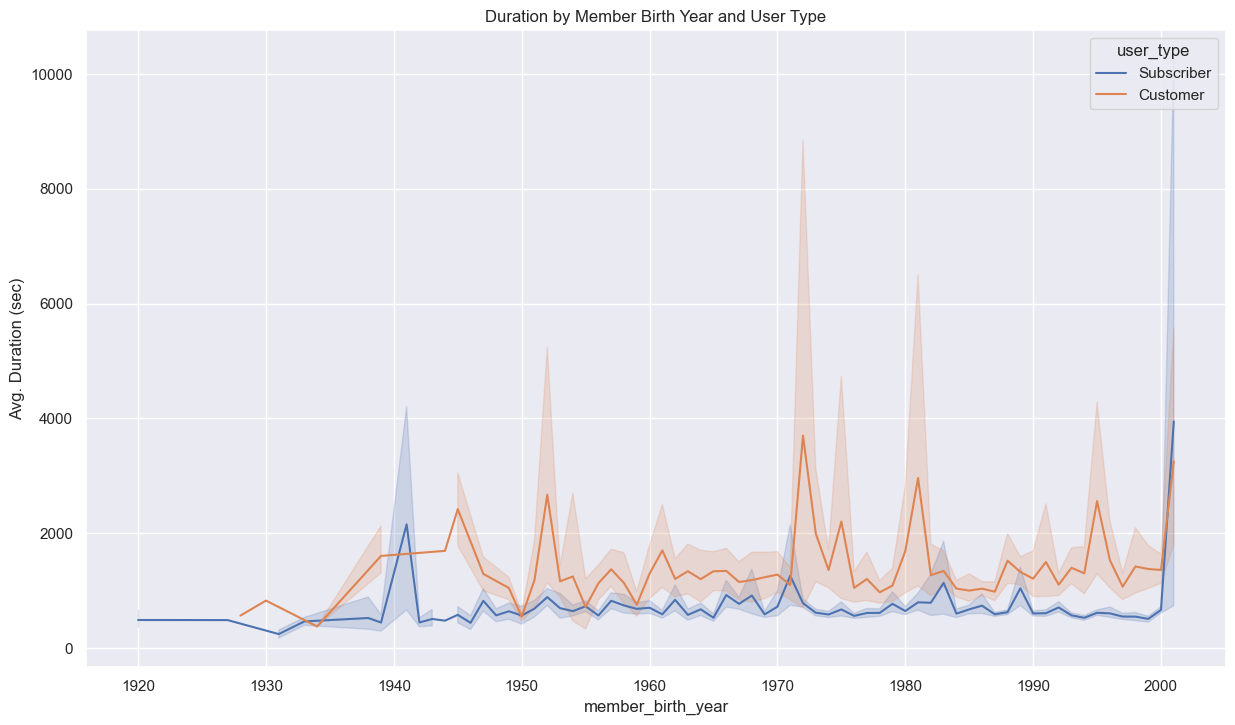

In [48]:
# line plot of average duration against birth year and user type
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.lineplot(data=bike_hour_type, x='member_birth_year', y='duration_sec',hue='user_type', color=base_color)
plt.ylabel('Avg. Duration (sec)');
plt.title('Duration by Member Birth Year and User Type');

The plot shows a rise in avg. duration for both user types around 2001. But there's no specific pattern or influence the realtionship between user types and birth year has on the avg. duration.

Let's investigate a little on the effect of gender on the relationship between duration and hour of the day

In [49]:
# first group the hour, member_gender and the mean duration in one table
bike_hour_gender = bike.groupby(['hour','member_gender']).mean(numeric_only=True)

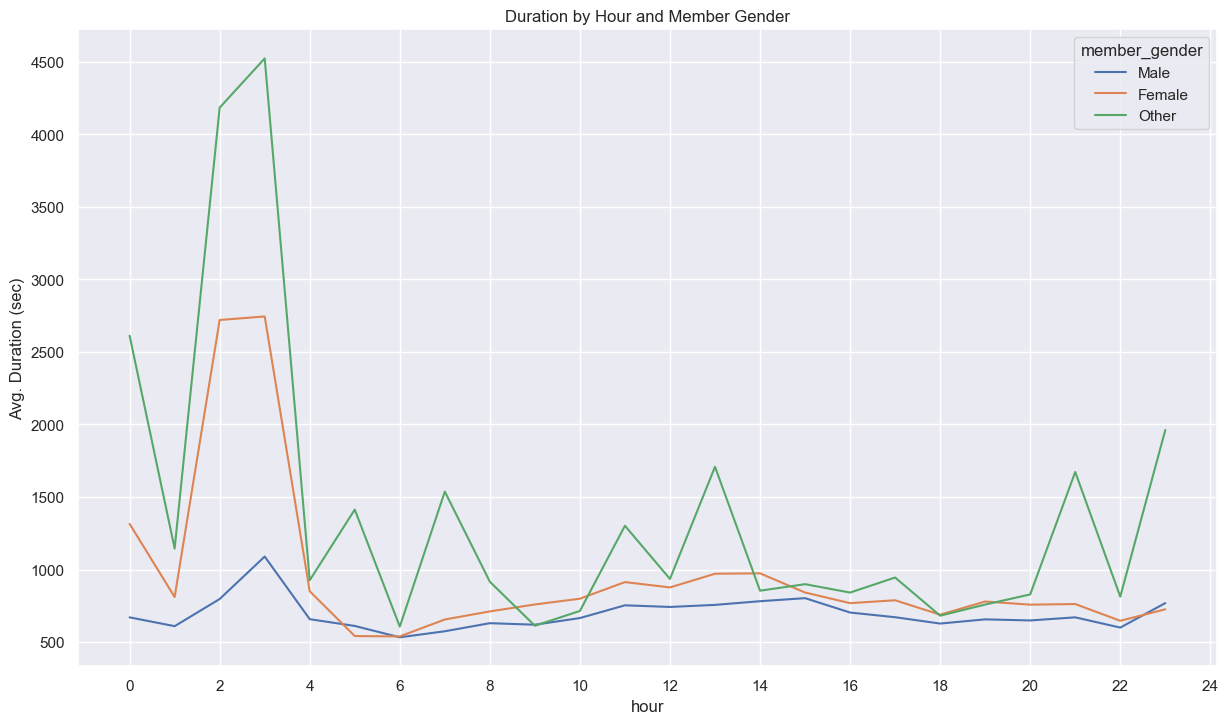

In [50]:
# line plot of average duration against hour and user gender
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.lineplot(data=bike_hour_gender, x="hour", y="duration_sec",
            hue='member_gender')
xticks=np.arange(0,23+2,2)
plt.xticks(xticks,xticks)
plt.ylabel('Avg. Duration (sec)');
plt.title('Duration by Hour and Member Gender');

As shown in the previous section, the other genders dominate the race when it comes to the trip duration. All genders peak around 1am to 4am. However, the male and female users follow a similar patter where the rest of the say is almost stable with avg. duration between 500 and 900 sec. But for the other genders,

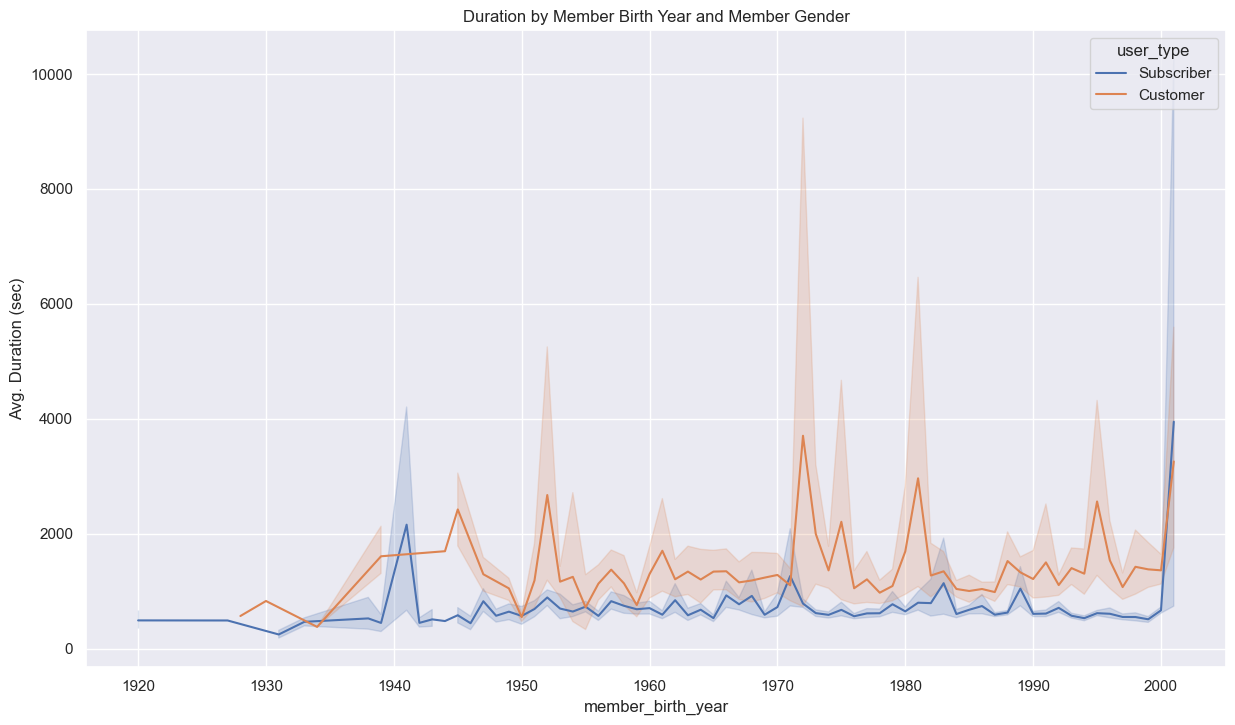

In [51]:
# line plot of average duration against birth year and user gender
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.lineplot(data=bike_hour_type, x='member_birth_year', y='duration_sec',hue='user_type', color=base_color)
plt.ylabel('Avg. Duration (sec)');
plt.title('Duration by Member Birth Year and Member Gender');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of average duration against the hour of the day in this section by looking at the impact of user types and gender. The multivariate exploration here showed that the relationship between the hour of the day the trip has started and the user types had a positive effect when it comes to the average duration. Customers tend to have higher average durations and more peaks throughout the day, in opposition to subscribers whose plot only peaked twice and remained stable for the rest of the day.<br>
The gender also affected the duration along with the hour of the day.<br>
For both relationships, There was a time of the day where the average duration peaked independently of the variables (1am to 4am). This indicates that the hour of the day alone can be strong predictior for the average duration.

### Were there any interesting or surprising interactions between features?

Looking back at the relationship between birth year and user types, There wasn't much of a systematic interaction between them. The effect of the relationship on the average duration didn't follow a specific pattern.

## Conclusions

In the exploration, I looked for the effect the indicators of the trip have on the average duration. I found that there was a strong relationship between the average duration and the user types. With a big difference, customer have tendencies to conduct average longer trips than subscribers. The user type seems to be a strong predictor of the length of trip.<br>
As for the gender, the investigation showed that gender can play a role in predicting the average duration of the trip, with the other genders having the highest value, then females then males.<br>
Another interesting Feature was the time of the day in which the trip started. I engineered a feature named `hour` that shows starting hour for the trip in the day. Surprisingly, there was a strong peak in hours between 1am and 4am with a duration of 1500 sec (25 min).<br>
I wanted to look at the relationship between these variables and their effects on the average duration. The exploration confirmed that the hour of the day was alone a strong predictor itself on the average duration.